# Gráficos de R, en Python

Una alternativa obvia es utilizar [Rpy](http://rpy.sourceforge.net/), que empotra a R dentro del proceso Python. Es simplemente una interfaz a un entorno de ejecución de R. 

NOTA: Esto es diferente de tener un Notebook Jupyter con kernels de R!

## Utilizando ggplot2, ejemplos básicos

La biblioteca ggplot en Python permite utilizar la biblioteca de gráficos ggplot2 de R, que intenta combinar lo mejor del paquete básicoy la biblioteca lattice de R.

Para instalarlo:
```
pip install ggplot
```
NOTA: La biblioteca no está implementada 100%. 

In [1]:
import statsmodels.api as sm
cats = sm.datasets.get_rdataset("cats", "MASS")
#print cats.__doc__
data = cats.data
data.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


## La filosofía de ggplot

Hay dos maneras de hacer gráficos en ggplot2:
* qplot() –  quick plots 
* ggplot() – control total de lo que se dibuja.


/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


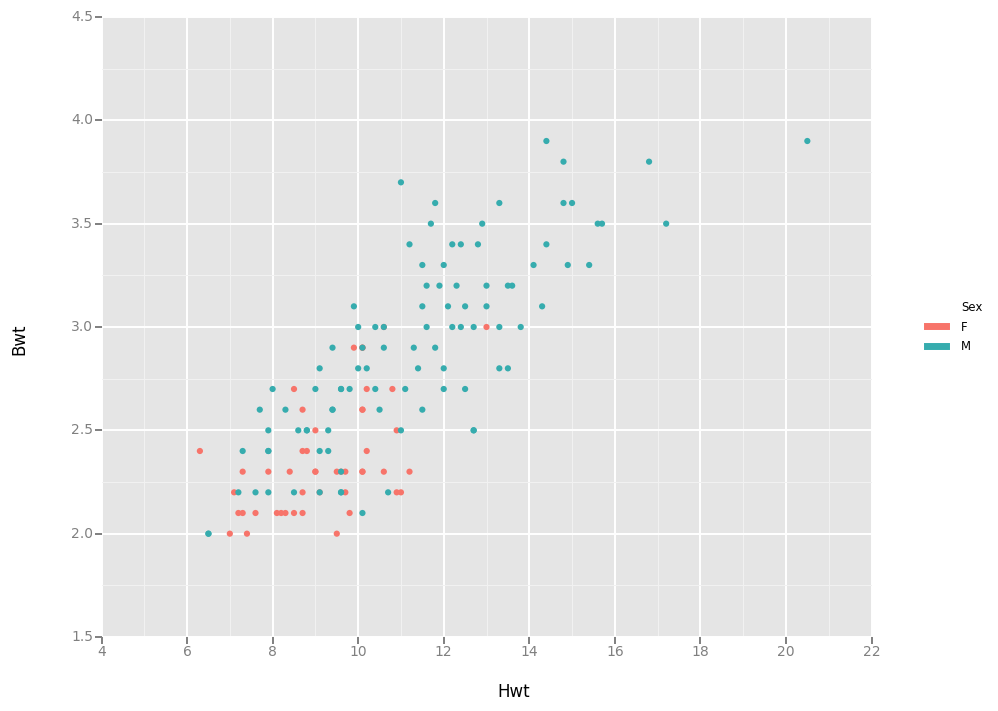

<ggplot: (293019657)>

In [2]:
%matplotlib inline
from ggplot import qplot
qplot(data=data, x="Hwt", y="Bwt", color="Sex")

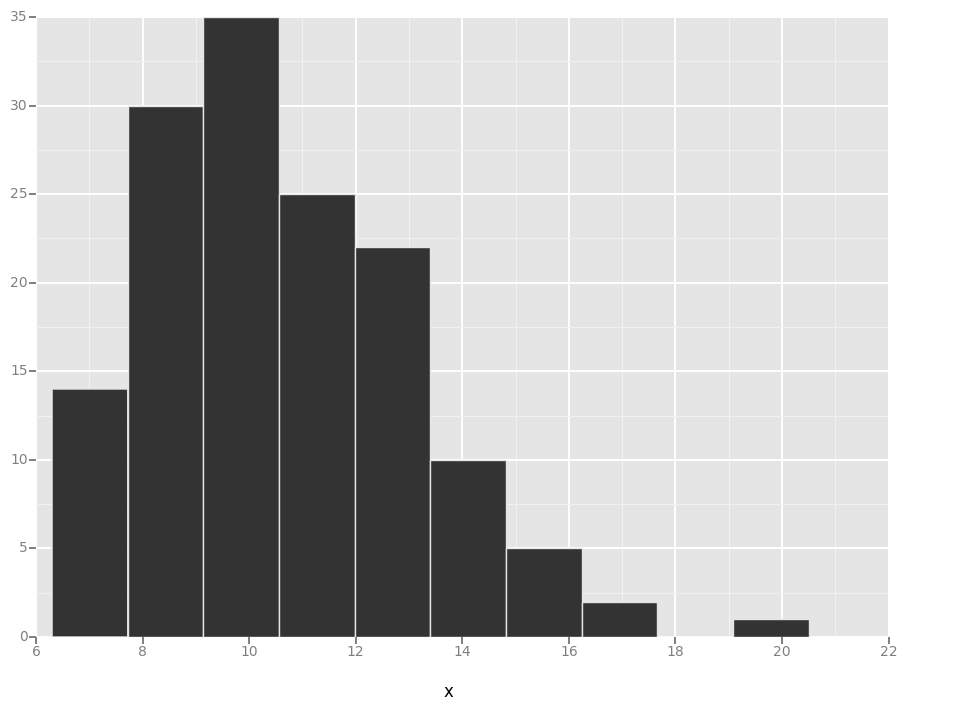

<ggplot: (292396285)>

In [3]:
qplot(data["Hwt"], geom="hist")

Al crear un gráfico, podemos especificar aes() y los datos. 

In [4]:
from ggplot import ggplot, aes, xlab, ylab, geom_point
p = ggplot(aes(x='Hwt', y='Bwt'), data=data)

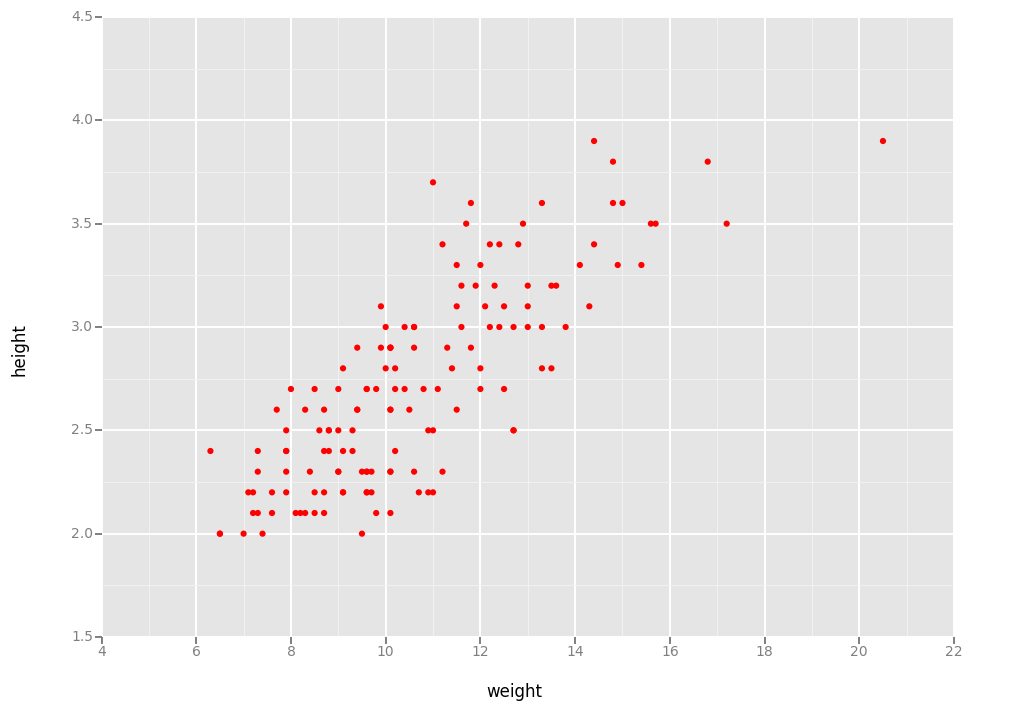

<ggplot: (292398473)>

In [5]:
p + xlab("weight") + ylab("height")+ geom_point(color = "red") 

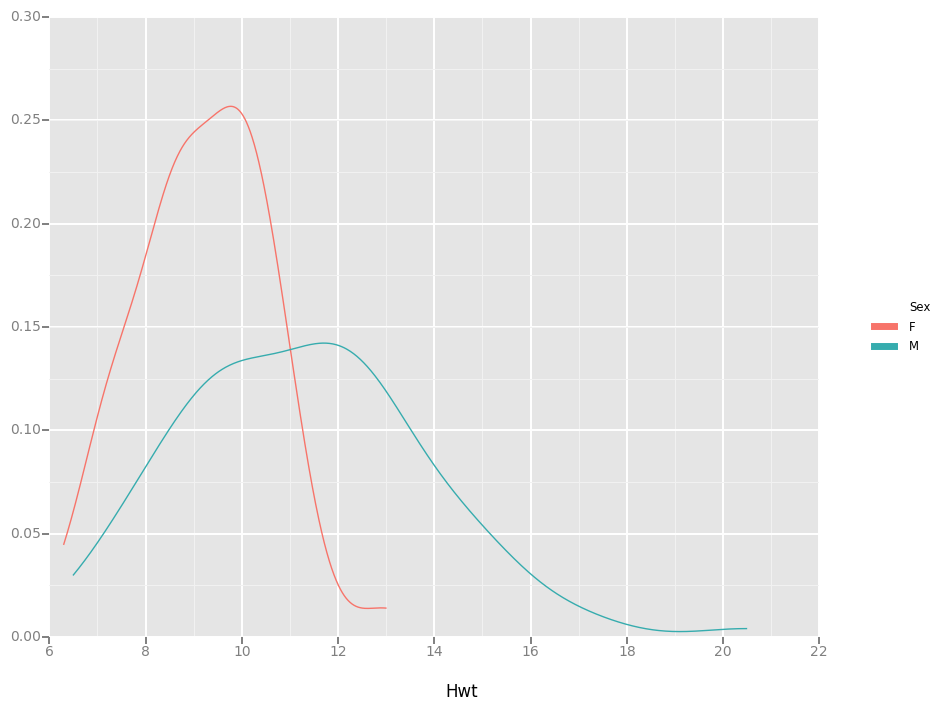

<ggplot: (292366097)>

In [6]:
from ggplot import geom_density
ggplot(aes(x='Hwt', color="Sex"), data=data) + geom_density()

## Facetas, escalas y temas

In [7]:
skulls = sm.datasets.get_rdataset("skulls", "HSAUR")
#print skulls.__doc__
data = skulls.data
data.head(3)

,epoch,mb,bh,bl,nh
0,c4000BC,131,138,89,49
1,c4000BC,125,131,92,48
2,c4000BC,131,132,99,50


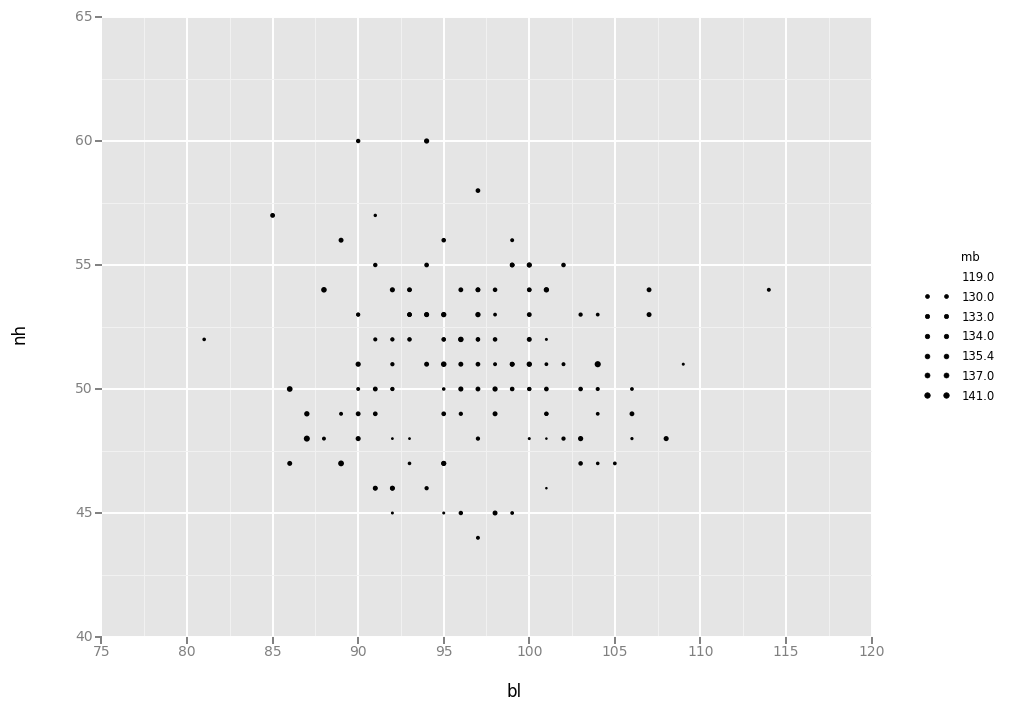

<ggplot: (272179673)>

In [8]:
qplot(data=data, x="bl", y = "nh", size="mb")

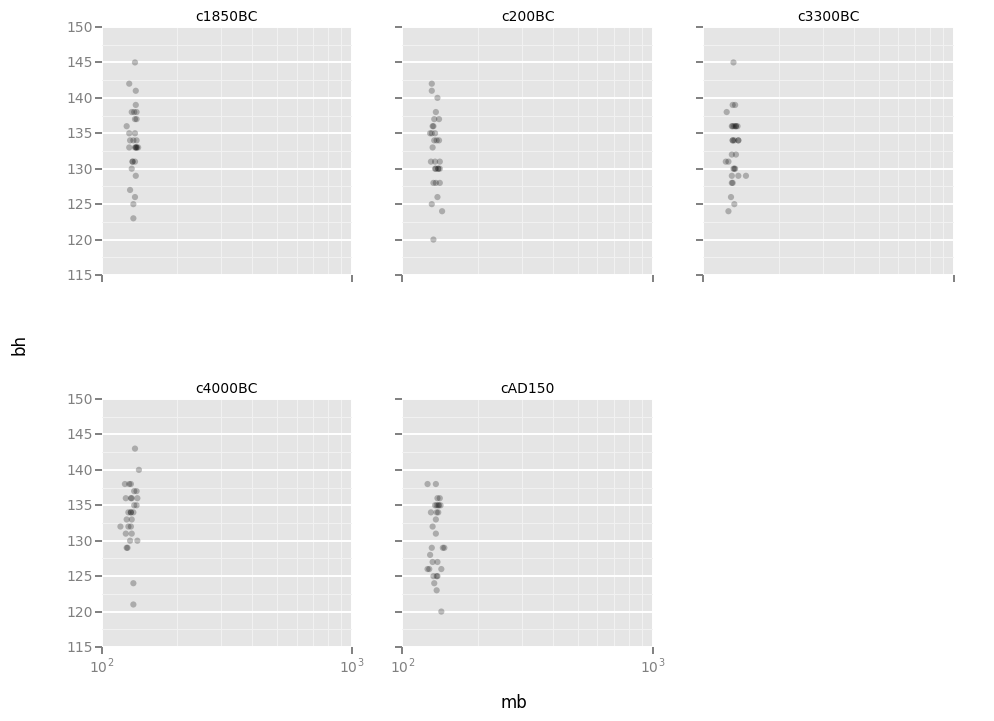

<ggplot: (293485089)>

In [9]:
from ggplot import facet_wrap, scale_x_log
fig = ggplot(data, aes(x='mb', y='bh')) +\
    geom_point(alpha=0.25) + scale_x_log()

fig + facet_wrap("epoch", nrow=2, ncol=3)

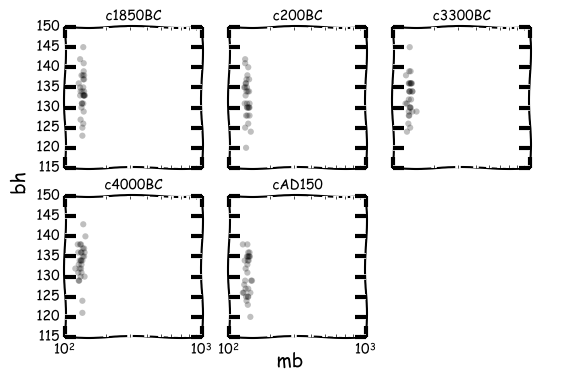

<ggplot: (293485089)>

In [10]:
from ggplot import theme_xkcd
fig + facet_wrap("epoch", nrow=2, ncol=3) + theme_xkcd()

## Utilizando RPlot (a extinguir)

RPlot es una biblioteca integrada en pandas que trata de implementar los "gráficos Trellis" que son muy útiles para observar la relación entre variables. Estos gráficos en R originalmente se implementaron en el paquete lattice.

In [11]:
import pandas as pd
import pandas.tools.rplot as rplot


/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.
  from ipykernel import kernelapp as app


In [12]:
plot = rplot.RPlot(data, x='exper', y='wage')
plot.add(rplot.TrellisGrid(['sex', "."]))
plot.add(rplot.GeomScatter())
plot.render()

KeyError: 'sex'